
# В рамках задания рассмотрим датасет с информацией о миллиардерах, вошедших в список Forbes в 2021 году

Данный датасет содержит в себе список миллиардеров, вошедших в Forbes в 2021 году. 
По мере работы с датасетом обнаружилось, что в нем мало числовых значений, зато есть возможности создавать разные категориальные переменные. 
В целом, датасет подошел для практики, ключевой показатель, который особенно был проанализирован, – возраст. Благодаря его вариативности и числовому формату его легко было применять с переменными другого формата.

In [420]:
#Сначала загрузим датасет

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
billionaire = pd.read_csv('Billionaire.csv')
billionaire

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [421]:
#Посмотрим топ миллиардеров. Как мы видим, большиснтво из США

billionaire.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified


In [422]:
#В самом низу по большей части богатые люди – из Китая

billionaire.tail(10)

,Name,NetWorth,Country,Source,Rank,Age,Industry
2745,Xu Jin,$1 B,China,wine,2674,56.0,Food & Beverage
2746,Vadim Yakunin,$1 B,Russia,pharmacy,2674,58.0,Healthcare
2747,Mark Haoyong Yang,$1 B,China,e-commerce,2674,46.0,Technology
2748,Yao Hsiao Tung,$1 B,Singapore,Manufacturing,2674,81.0,Manufacturing
2749,Yu De-Chao,$1 B,United States,pharmaceuticals,2674,57.0,Healthcare
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified
2754,Zhou Wei family,$1 B,China,Software,2674,54.0,Technology


In [423]:
#Если посмотреть 10 миллиардеров, которые уже не входят в топ-100, можно заметить людей и из других стран – Тайланда, Гонконга, России и Чехии 

billionaire.iloc[100:110]

,Name,NetWorth,Country,Source,Rank,Age,Industry
100,Wu Yajun,$18.3 B,China,real estate,100,57.0,Real Estate
101,Fan Hongwei & family,$18.2 B,China,petrochemicals,102,54.0,Energy
102,Dhanin Chearavanont,$18.1 B,Thailand,diversified,103,81.0,Diversified
103,Peter Woo,$18 B,Hong Kong,real estate,104,74.0,Real Estate
104,Chen Bang,$17.9 B,China,hospitals,105,55.0,Healthcare
105,Andrey Melnichenko,$17.9 B,Russia,"coal, fertilizers",105,49.0,Energy
106,Dustin Moskovitz,$17.8 B,United States,Facebook,107,36.0,Technology
107,Su Hua,$17.8 B,China,video streaming,107,39.0,Media & Entertainment
108,Donald Newhouse,$17.6 B,United States,media,109,91.0,Media & Entertainment
109,Petr Kellner,$17.5 B,Czechia,"finance, telecommunications",110,56.0,Finance & Investments


In [424]:
#Еще раз рассмотрим данные, которые нам доступны

billionaire.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Industry'], dtype='object')

In [425]:
billionaire.shape

(2755, 7)

In [426]:
billionaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [427]:
#Рассмотрим возраст миллиардеров. Как видно из колонки, люди добиваются успеха как после 30, так и после 70

billionaire['Age']

0       57.0
1       49.0
2       72.0
3       65.0
4       36.0
        ... 
2750    49.0
2751    65.0
2752    58.0
2753    58.0
2754    54.0
Name: Age, Length: 2755, dtype: float64

In [428]:
#Интересно проверить, какой возраст не повторяется. Впечатляет, что есть люди, которым 97 и 18 лет 

billionaire['Age'].unique()

array([57., 49., 72., 65., 36., 90., 76., 48., 47., 63., 85., 67., 66.,
       81., 71., 79., 41., 50., 59., 58., 83., 56., 84., 69., 75., 78.,
       37., 70., 92., 55., 93., 39., 52., 62., 60., 64., 42., 88., 82.,
       51., 68., 74., 54., 53., 73., 80., 43., 91., 45., 34., nan, 61.,
       97., 44., 32., 30., 40., 89., 77., 29., 35., 86., 38., 87., 94.,
       46., 95., 27., 96., 31., 18., 26., 33., 28., 99., 24., 25.])

In [429]:
#Говоря о связи между возрастом и местом в рейтинге, возраст в топ-5 имеет большой разброс, а в самом низу людям в основном 50 и больше

billionaire[['Rank','Age']]

,Rank,Age
0,1,57.0
1,2,49.0
2,3,72.0
3,4,65.0
4,5,36.0
...,...,...
2750,2674,49.0
2751,2674,65.0
2752,2674,58.0
2753,2674,58.0


In [430]:
#Попробуем рассмотреть любого отдельно миллиардера. Например, человека на 1000 месте. Нам попался Геральд Линк из Тайланда, ему 60 лет, состояние 3.1 миллиарда долларов, источники дохода многоотраслевые

billionaire.iloc[1000]

Name        Harald Link
NetWorth         $3.1 B
Country        Thailand
Source      diversified
Rank                986
Age                66.0
Industry    Diversified
Name: 1000, dtype: object

In [431]:
#Также, мы можем узнать страну (или другую информацию) отдельно, не просматривая весь профиль миллиардера. Например, с тем же Геральдом на 1000 месте 

billionaire.iloc[1000]['Country']

'Thailand'

In [432]:
#А теперь попробуем отфильтровать данные по стране. Интересует Китай. Как мы видим, в Китае много богатых людей – целых 626 миллиардеров в Forbes

billionaire[billionaire['Country'] == 'China']

,Name,NetWorth,Country,Source,Rank,Age,Industry
12,Zhong Shanshan,$68.9 B,China,"beverages, pharmaceuticals",13,66.0,Food & Beverage
14,Ma Huateng,$65.8 B,China,internet media,15,49.0,Technology
20,Colin Zheng Huang,$55.3 B,China,e-commerce,21,41.0,Technology
25,Jack Ma,$48.4 B,China,e-commerce,26,56.0,Technology
34,Wang Wei,$39 B,China,package delivery,35,50.0,Service
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [433]:
#Также, мы можем не запрашивать таблицу каждый раз, количество легко узнать при помощи shape

billionaire[billionaire['Country'] == 'China'].shape

(626, 7)

In [434]:
#Теперь усложним задачу и узнаем, сколько миллиардеров из Китая имеют возраст больше 80 лет – не так уже много, 8 человек

billionaire[(billionaire['Country'] == 'China')&(billionaire['Age'] >= 80.0)]

,Name,NetWorth,Country,Source,Rank,Age,Industry
476,Chan Laiwa & family,$5.8 B,China,real estate,476,80.0,Real Estate
620,Zhou Bajin,$4.7 B,China,auto parts,608,85.0,Manufacturing
771,Wu Zhigang & family,$3.9 B,China,bakery chain,752,86.0,Food & Beverage
1284,Ruan Shuilong & family,$2.5 B,China,chemicals,1249,85.0,Manufacturing
1436,Xu Chuanhua & family,$2.3 B,China,"chemicals, logistics",1362,86.0,Manufacturing
1515,Zhang Jingzhang & family,$2.2 B,China,precision machinery,1444,85.0,Manufacturing
1734,Wan Long,$1.9 B,China,food,1664,80.0,Food & Beverage
1983,Mao Lixiang & family,$1.6 B,China,cooking appliances,1931,80.0,Technology


In [435]:
#Кажется, что в списке Forbes в основном люди средних лет из США, так как в топ-10 входят по большей части именно они. Попробуем убрать их и посмотреть, сколько миллиардеров из других стран в списке в целом. Много – 1882 человека

billionaire[~(billionaire['Country'] == 'United States')&(billionaire['Age'] >= 40.0)]

,Name,NetWorth,Country,Source,Rank,Age,Industry
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified
10,Amancio Ortega,$77 B,Spain,Zara,11,85.0,Fashion & Retail
11,Francoise Bettencourt Meyers & family,$73.6 B,France,L'Oréal,12,67.0,Fashion & Retail
12,Zhong Shanshan,$68.9 B,China,"beverages, pharmaceuticals",13,66.0,Food & Beverage
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [436]:
#Интересно рассматривать возраст успешных людей, однако некоторые миллиардеры скрывают его. Таких 79 человек

billionaire[billionaire['Age'].isna()]

,Name,NetWorth,Country,Source,Rank,Age,Industry
132,Hinduja brothers,$14.9 B,United Kingdom,diversified,133,NaN,Diversified
255,Lam Wai-ying,$9.1 B,Hong Kong,smartphone screens,256,NaN,Manufacturing
268,Chan Tan Ching-fen,$8.8 B,Hong Kong,real estate,269,NaN,Real Estate
285,Anthony von Mandl,$8.7 B,Canada,alcoholic beverages,274,NaN,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,$8.4 B,India,paints,294,NaN,Manufacturing
...,...,...,...,...,...,...,...
2580,Lai Baosheng,$1.1 B,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,$1.1 B,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,$1 B,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,$1 B,Canada,packaged meats,2674,NaN,Food & Beverage


# Сортировка

In [437]:
billionaire['Age'].sort_values()

940     18.0
2143    24.0
2122    24.0
2144    25.0
1338    26.0
        ... 
2580     NaN
2639     NaN
2680     NaN
2714     NaN
2720     NaN
Name: Age, Length: 2755, dtype: float64

In [438]:
#Как мы видим, данные представились в порядке возрастания, теперь попробуем отсортировать в порядке убывания
#Однако в конце идут значения NaN, так как они не могут быть отсортированы

billionaire['Age'].sort_values(ascending=False)

1611    99.0
1626    97.0
170     97.0
1559    97.0
729     96.0
        ... 
2580     NaN
2639     NaN
2680     NaN
2714     NaN
2720     NaN
Name: Age, Length: 2755, dtype: float64

In [439]:
#Самому старому миллиардеру 99 лет, а аж трем по 97
#Также, мы можем отсортировать все данные по столбцу (часто используем это в Excel)

billionaire.sort_values(by=['Age'])

,Name,NetWorth,Country,Source,Rank,Age,Industry
940,Kevin David Lehmann,$3.3 B,Germany,drugstores,925,18.0,Fashion & Retail
2143,Alexandra Andresen,$1.4 B,Norway,investments,2141,24.0,Diversified
2122,Wang Zelong,$1.5 B,China,chemicals,2035,24.0,Metals & Mining
2144,Katharina Andresen,$1.4 B,Norway,investments,2141,25.0,Diversified
1338,Austin Russell,$2.4 B,United States,★,1299,26.0,Automotive
...,...,...,...,...,...,...,...
2580,Lai Baosheng,$1.1 B,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,$1.1 B,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,$1 B,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,$1 B,Canada,packaged meats,2674,NaN,Food & Beverage


In [440]:
#Стоит заметить, что самому молодому миллиардеру 18 лет, он занимается модой, а далее идет 24-летняя девушка. Впечатляет.
#Мы можем представить таблицу и в другом порядке

billionaire.sort_values(by=['Age'], ascending=False)

,Name,NetWorth,Country,Source,Rank,Age,Industry
1611,George Joseph,$2 B,United States,insurance,1580,99.0,Finance & Investments
1626,Charles Munger,$2 B,United States,Berkshire Hathaway,1580,97.0,Finance & Investments
170,Robert Kuok,$12.6 B,Malaysia,"palm oil, shipping, property",171,97.0,Diversified
1559,David Murdock,$2.1 B,United States,"Dole, real estate",1517,97.0,Food & Beverage
729,Masatoshi Ito,$4 B,Japan,retail,727,96.0,Fashion & Retail
...,...,...,...,...,...,...,...
2580,Lai Baosheng,$1.1 B,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,$1.1 B,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,$1 B,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,$1 B,Canada,packaged meats,2674,NaN,Food & Beverage


In [441]:
#Самые старшие миллиардеры зарабатывают на финансах
#Теперь попробуем отсортировать по двум переменным – помимо возраста возьмем место в списке

billionaire.sort_values(by=['Age', 'Rank'])

,Name,NetWorth,Country,Source,Rank,Age,Industry
940,Kevin David Lehmann,$3.3 B,Germany,drugstores,925,18.0,Fashion & Retail
2122,Wang Zelong,$1.5 B,China,chemicals,2035,24.0,Metals & Mining
2143,Alexandra Andresen,$1.4 B,Norway,investments,2141,24.0,Diversified
2144,Katharina Andresen,$1.4 B,Norway,investments,2141,25.0,Diversified
1338,Austin Russell,$2.4 B,United States,★,1299,26.0,Automotive
...,...,...,...,...,...,...,...
2580,Lai Baosheng,$1.1 B,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,$1.1 B,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,$1 B,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,$1 B,Canada,packaged meats,2674,NaN,Food & Beverage


In [442]:
#Как видно, сортировка по всем переменным стоит по возрастанию. Как видно, та 24-летняя миллиардерша не самая богатая среди свои ровесников
#Попробуем рассмотреть старшее поколение


billionaire.sort_values(by=['Age', 'Rank'], ascending=[False, True])

,Name,NetWorth,Country,Source,Rank,Age,Industry
1611,George Joseph,$2 B,United States,insurance,1580,99.0,Finance & Investments
170,Robert Kuok,$12.6 B,Malaysia,"palm oil, shipping, property",171,97.0,Diversified
1559,David Murdock,$2.1 B,United States,"Dole, real estate",1517,97.0,Food & Beverage
1626,Charles Munger,$2 B,United States,Berkshire Hathaway,1580,97.0,Finance & Investments
729,Masatoshi Ito,$4 B,Japan,retail,727,96.0,Fashion & Retail
...,...,...,...,...,...,...,...
2580,Lai Baosheng,$1.1 B,China,consumer technology,2524,NaN,Technology
2639,Tseng Sing-ai,$1.1 B,Taiwan,petrochemicals,2524,NaN,Manufacturing
2680,Carmen Daurella Aguilera,$1 B,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage
2714,Michael McCain,$1 B,Canada,packaged meats,2674,NaN,Food & Beverage


In [443]:
#Среди трех 97-летних миллиардеров с большим отрывом лидирует тот, у кого разные источники доходов
#Далее создадим свои переменные

# Создание переменных

In [444]:
#Так как все перемнные в таблицы имеют разный формат, их невозможно суммировать, чтобы сделать новую
#Посмотрим информацию о базе данных, чтобы понять, как можно ее изменить 

billionaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [445]:
#К сожалению, в базе данных нет дат, поработать с ними не сможем
#Зато у нас есть возможность сделать бинарную категориальную переменную – снова попробуем с возрастом и проверим, сколько у нас миллиардеров в возрасте от 80

billionaire['Old money'] = billionaire['Age'].apply(lambda x: 1 if x in range(80,100) else 0)

In [446]:
billionaire.head(30)

,Name,NetWorth,Country,Source,Rank,Age,Industry,Old money
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,0
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,0
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,0
5,Warren Buffett,$96 B,United States,Berkshire Hathaway,6,90.0,Finance & Investments,1
6,Larry Ellison,$93 B,United States,software,7,76.0,Technology,0
7,Larry Page,$91.5 B,United States,Google,8,48.0,Technology,0
8,Sergey Brin,$89 B,United States,Google,9,47.0,Technology,0
9,Mukesh Ambani,$84.5 B,India,diversified,10,63.0,Diversified,0


In [447]:
#Как видно, в топе не так уж много пожилых миллиардеров, среди первых 30 всего пятеро
#Теперь попробуем перевести количественные переменные в качественные
#Снова поработаем с возрастом

def age_level(age):
    if age < 30:
        return 'young rich'
    elif age <50:
        return 'mature'
    elif age <70:
        return 'wise'
    elif age <100:
        return 'old money'
    else:
        return age

In [448]:
billionaire['Age'].apply(age_level)

0            wise
1          mature
2       old money
3            wise
4          mature
          ...    
2750       mature
2751         wise
2752         wise
2753         wise
2754         wise
Name: Age, Length: 2755, dtype: object

In [449]:
#Теперь каждый миллиардер будет относиться к какой-либо возрастной группе
#Сохраним эти категории 

billionaire['Age level'] = billionaire['Age'].apply(age_level)

In [450]:
billionaire.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,Old money,Age level
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology,0,wise
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive,0,mature
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail,0,old money
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology,0,wise
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology,0,mature


In [451]:
#Сделаем новую переменную категориальной

billionaire['Age level'] = pd.Categorical(billionaire['Age level'])

In [452]:
billionaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       2755 non-null   object  
 1   NetWorth   2755 non-null   object  
 2   Country    2755 non-null   object  
 3   Source     2755 non-null   object  
 4   Rank       2755 non-null   int64   
 5   Age        2676 non-null   float64 
 6   Industry   2755 non-null   object  
 7   Old money  2755 non-null   int64   
 8   Age level  2676 non-null   category
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 175.2+ KB


In [453]:
#Теперь мы можем подробнее узнать о категориях

billionaire['Age level']

0            wise
1          mature
2       old money
3            wise
4          mature
          ...    
2750       mature
2751         wise
2752         wise
2753         wise
2754         wise
Name: Age level, Length: 2755, dtype: category
Categories (4, object): ['mature', 'old money', 'wise', 'young rich']

In [454]:
#Категории четыре, указаны названия
#Теперь у нас есть числовая колонка про возраст и строковая
#Попробуем закодировать числами

billionaire['Age level'].cat.codes

0       2
1       0
2       1
3       2
4       0
       ..
2750    0
2751    2
2752    2
2753    2
2754    2
Length: 2755, dtype: int8

In [455]:
#Или посмотрим только строковые значения

billionaire['Age level'].cat.categories

Index(['mature', 'old money', 'wise', 'young rich'], dtype='object')

In [456]:
#Теперь создадим комплексную переменную
#Назовем Чудо – это человек младше 30 лет и входящий в 500 миллирдеров

billionaire['Miracle'] = np.where((billionaire['Age level'] == 'young rich') &
    (billionaire['Rank'] < 500), 1, 0)

In [457]:
billionaire['Miracle'].sum()

1

In [458]:
#Как видим, среди первых 500 миллиардеров всего один младше 30 лет. Правда чудо
#Теперь сохраним полученную таблицу 

billionaire.to_csv('BillionaireUPD.csv', index=False)
billionaire.to_excel('BillionaireUPD.xlsx', index=False)
df = pd.read_csv('BillionaireUPD.csv')
df.info

<bound method DataFrame.info of                           Name NetWorth        Country         Source  Rank  \
0                   Jeff Bezos   $177 B  United States         Amazon     1   
1                    Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2     Bernard Arnault & family   $150 B         France           LVMH     3   
3                   Bill Gates   $124 B  United States      Microsoft     4   
4              Mark Zuckerberg    $97 B  United States       Facebook     5   
...                        ...      ...            ...            ...   ...   
2750         Daniel Yong Zhang     $1 B          China     e-commerce  2674   
2751             Zhang Yuqiang     $1 B          China     Fiberglass  2674   
2752             Zhao Meiguang     $1 B          China    gold mining  2674   
2753            Zhong Naixiong     $1 B          China   conglomerate  2674   
2754           Zhou Wei family     $1 B          China       Software  2674   

       Age         

In [459]:
billionaire.to_pickle('BillionaireUPD.pkl')
df = pd.read_pickle('BillionaireUPD.pkl')
df.info

<bound method DataFrame.info of                           Name NetWorth        Country         Source  Rank  \
0                   Jeff Bezos   $177 B  United States         Amazon     1   
1                    Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2     Bernard Arnault & family   $150 B         France           LVMH     3   
3                   Bill Gates   $124 B  United States      Microsoft     4   
4              Mark Zuckerberg    $97 B  United States       Facebook     5   
...                        ...      ...            ...            ...   ...   
2750         Daniel Yong Zhang     $1 B          China     e-commerce  2674   
2751             Zhang Yuqiang     $1 B          China     Fiberglass  2674   
2752             Zhao Meiguang     $1 B          China    gold mining  2674   
2753            Zhong Naixiong     $1 B          China   conglomerate  2674   
2754           Zhou Wei family     $1 B          China       Software  2674   

       Age         

# Группировка данных

In [460]:
#Посчитаем количество объектов по новым категориям

billionaire['Age level'].value_counts()

wise          1396
old money      879
mature         391
young rich      10
Name: Age level, dtype: int64

In [461]:
#Как видно, у нас всего 10 миллиардеров, которым меньше 30, и больше всего – в возрасте 50-70 лет
#Удобно, что  данные отображаются в порядке убывания
#Посмотрим, сколько у нас объектов, по которым нет данных

billionaire['Age level'].value_counts(dropna=False)

wise          1396
old money      879
mature         391
NaN             79
young rich      10
Name: Age level, dtype: int64

In [462]:
#Что ж, не так уж и много
#Теперь посмотрим, сколько у нас "чудес" – миллиардеров, младше 30 и в топ-500, мы уже делали это раннее, но посчитаем другим способ

billionaire['Miracle'].value_counts()

0    2754
1       1
Name: Miracle, dtype: int64

In [463]:
#Как видим, это один человек
#Теперь попробуем сгруппировать переменные – сколько у нас пожилых миллиардеров по странам

billionaire.groupby('Country')['Old money'].sum()

Country
Algeria             0
Argentina           3
Australia           7
Austria             4
Belgium             0
                 ... 
United Kingdom      9
United States     124
Venezuela           0
Vietnam             0
Zimbabwe            0
Name: Old money, Length: 70, dtype: int64

In [464]:
#Интересно, что в США их достаточно много – аж 124 
#Попробуем посмотреть информацию о переменной "Страны"

list(billionaire.groupby('Country'))

[('Algeria',
                        Name NetWorth  Country Source  Rank   Age  \
  597  Issad Rebrab & family   $4.8 B  Algeria   food   589  77.0   
  
              Industry  Old money  Age level  Miracle  
  597  Food & Beverage          0  old money        0  ),
 ('Argentina',
                                   Name NetWorth    Country  \
  441                   Marcos Galperin   $6.1 B  Argentina   
  927              Alejandro Bulgheroni   $3.3 B  Argentina   
  1336  Gregorio Perez Companc & family   $2.4 B  Argentina   
  1494                 Alberto Roemmers   $2.2 B  Argentina   
  2292                Eduardo Eurnekian   $1.3 B  Argentina   
  
                       Source  Rank   Age     Industry  Old money  Age level  \
  441              e-commerce   440   NaN   Technology          0        NaN   
  927               oil & gas   925  76.0       Energy          0  old money   
  1336              oil & gas  1299  85.0       Energy          1  old money   
  1494        ph

In [465]:
#Вышла информация по каждой стране
#Теперь посмотрим, сколько вообще стран с миллиардерами существует

len(list(billionaire.groupby('Country')))

70

In [466]:
#Целых 70 стран
#Посчитаем, сколько миллиардеров по каждой стране

billionaire.groupby('Country').size()

Country
Algeria             1
Argentina           5
Australia          44
Austria            12
Belgium             3
                 ... 
United Kingdom     56
United States     724
Venezuela           1
Vietnam             6
Zimbabwe            1
Length: 70, dtype: int64

In [467]:
#Ожидаемо, что в США будет больше всех
#Теперь посмотрим, сколько у нас пожилых миллиардеров по источникам дохода и странам

billionaire.groupby(['Country', 'Industry'])['Old money'].sum()

Country    Industry             
Algeria    Food & Beverage          0
Argentina  Diversified              1
           Energy                   1
           Healthcare               1
           Technology               0
                                   ..
Vietnam    Diversified              0
           Finance & Investments    0
           Food & Beverage          0
           Manufacturing            0
Zimbabwe   Telecom                  0
Name: Old money, Length: 436, dtype: int64

<AxesSubplot:>

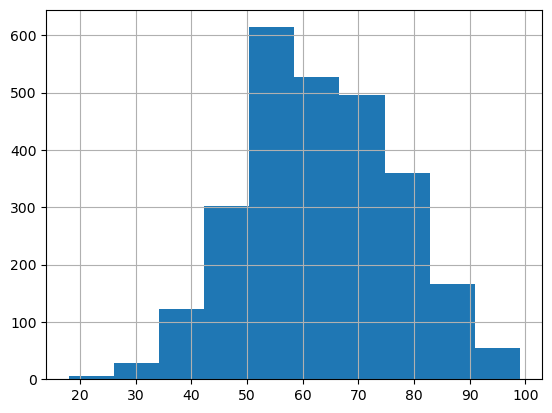

In [468]:
#Очень много данных, поэтому видно только четыре страны
#Однако интересно, что пожилые миллиардеры зарабатывают на энергетике, здоровье и имеют диверсифицированный портфель доходов
#Теперь визуализируем данные – по возрасту

billionaire['Age'].hist()

<AxesSubplot:>

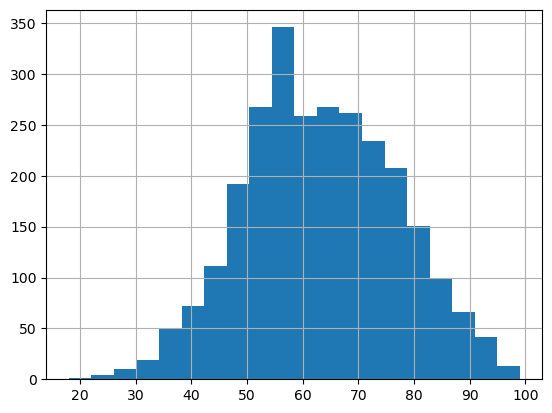

In [469]:
#Попробуем сделать ее подробнее

billionaire['Age'].hist(bins=20)

<AxesSubplot:>

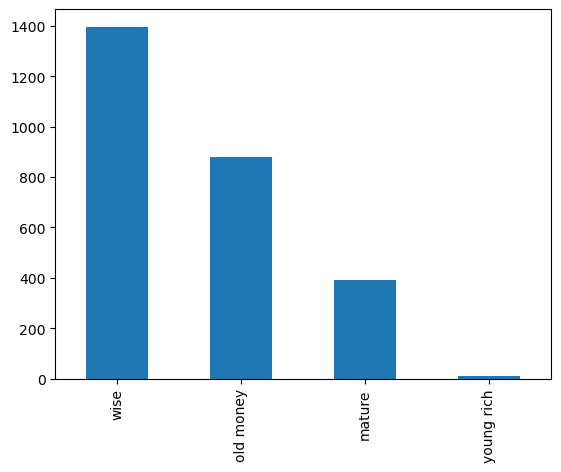

In [470]:
#Возьмем категориальную переменную и визуализируем ее

billionaire['Age level'].value_counts().plot(kind='bar')

In [471]:
#Теперь визуализируем, сколько пожилых миллардеров приходится на каждую индустрию
#Сначала сделаем отдельную таблицу

billionaire.groupby(['Industry'])['Old money'].value_counts().unstack()

Old money,0,1
Industry,,
Automotive,62,6
Construction & Engineering,40,4
Diversified,155,33
Energy,89,11
Fashion & Retail,225,48
Finance & Investments,318,53
Food & Beverage,188,31
Gambling & Casinos,21,4
Healthcare,199,22


<AxesSubplot:xlabel='Industry'>

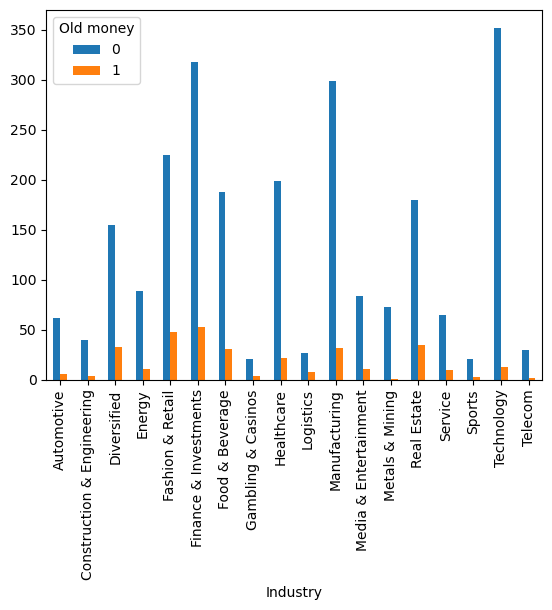

In [472]:
#Создаем график

billionaire.groupby(['Industry'])['Old money'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Industry'>

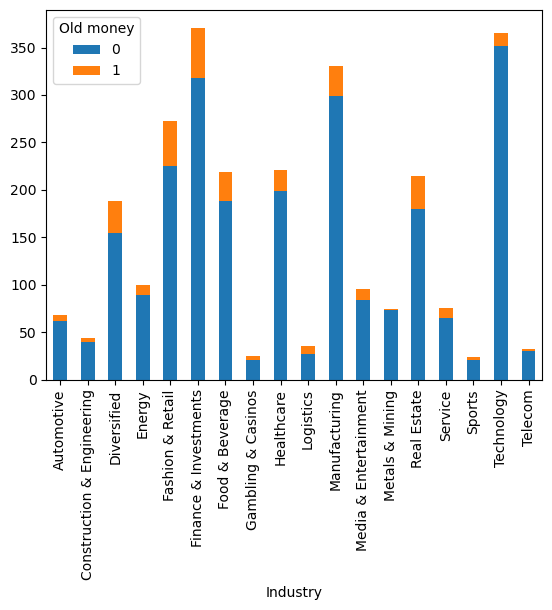

In [473]:
#Получилась достаточно наглядная визуализация
#Попробуем другим способом

billionaire.groupby(['Industry'])['Old money'].value_counts().unstack().plot(kind='bar', stacked=True)

# Меры центральной тенденции

In [474]:
#Начнем со среднего арифметического – посчитаем средний возраст миллиардера

billionaire['Age'].sum() / len(billionaire['Age'])

61.3038112522686

In [475]:
#Отлично, средний возраст относится к категории Wise, которая у нас самая многочисленная
#Теперь посчитаем по формуле

billionaire['Age'].mean()

63.1136023916293

In [476]:
#Значения отличаются, так как в формуле использовались значения NaN
#Теперь посчитаем медиану
#Для начала выведем, сколько у нас значений

age_sorted = billionaire['Age'].sort_values().reset_index(drop=True)
print(len(age_sorted))

2755


In [477]:
#Их нечетное количество, поэтому у нас будет точная медиана
#Нам не нужно выводить два значения посередине и считать среднее, как бы мы это делали при четном количестве данных
#Найдем сразу по формуле

billionaire['Age'].median()

63.0

In [478]:
#Почти сходится со средним арифметическим
#Найдем моду

billionaire['Age'].value_counts()

57.0    93
58.0    92
59.0    85
56.0    84
71.0    78
        ..
27.0     1
18.0     1
26.0     1
99.0     1
25.0     1
Name: Age, Length: 76, dtype: int64

In [479]:
#Самый часто встречающийся возраст среди миллиардеров – 57 лет
#Применим формулу

billionaire['Age'].mode()

0    57.0
Name: Age, dtype: float64

In [480]:
#Все сошлось, значит, все сделано правильно
#Посмотрим информацию по разным показателям

billionaire.describe()

,Rank,Age,Old money,Miracle
count,2755.000000,2676.000000,2755.000000,2755.000000
mean,1345.663521,63.113602,0.118693,0.000363
std,772.669811,13.445153,0.323486,0.019052
min,1.000000,18.000000,0.000000,0.000000
25%,680.000000,54.000000,0.000000,0.000000
50%,1362.000000,63.000000,0.000000,0.000000
75%,2035.000000,73.000000,0.000000,0.000000
max,2674.000000,99.000000,1.000000,1.000000


In [481]:
#Данная таблица позволяет посмотреть релевантную информацию по возрасту, остальные не подходят под формат вычесления среднего, моды и прочего
#Поэтому уберем лишнее

billionaire['Age'].describe()

count    2676.000000
mean       63.113602
std        13.445153
min        18.000000
25%        54.000000
50%        63.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64

In [482]:
#Теперь посмотрим средний возраст по индустрии

billionaire.groupby('Industry')['Age'].mean()

Industry
Automotive                    61.149254
Construction & Engineering    64.674419
Diversified                   67.233333
Energy                        64.838384
Fashion & Retail              66.082090
Finance & Investments         64.558904
Food & Beverage               65.348039
Gambling & Casinos            67.080000
Healthcare                    62.755869
Logistics                     66.057143
Manufacturing                 62.252366
Media & Entertainment         62.043478
Metals & Mining               58.917808
Real Estate                   66.042654
Service                       63.301370
Sports                        70.666667
Technology                    54.833803
Telecom                       64.718750
Name: Age, dtype: float64

<AxesSubplot:xlabel='Industry'>

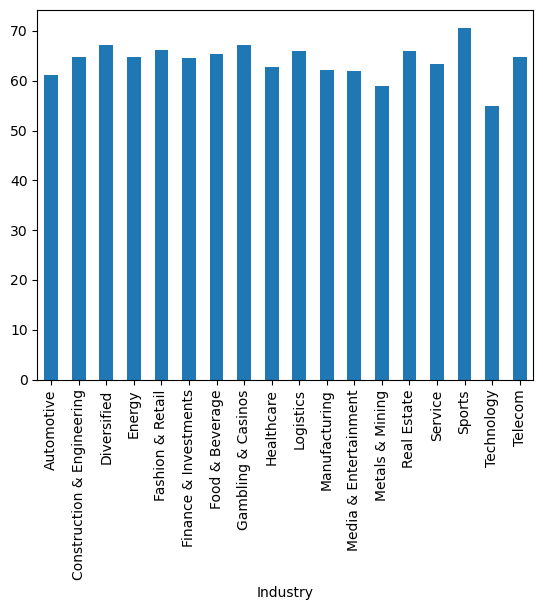

In [483]:
#Интересно, что в индустрии технологий миллиардеры в среднем помоложе
#Визуализируем

billionaire.groupby('Industry')['Age'].mean().plot(kind='bar')

In [484]:
#Посмотрим распределение среднего возраста по стране и индустрии

billionaire.groupby(['Industry', 'Country'])['Age'].mean()

Industry    Country       
Automotive  Australia         64.000000
            Austria           72.000000
            China             54.294118
            France            72.000000
            Germany           53.250000
                                ...    
Telecom     South Korea       60.000000
            Turkey            73.000000
            United Kingdom    66.333333
            United States     68.250000
            Zimbabwe          60.000000
Name: Age, Length: 436, dtype: float64

In [485]:
#Получилось достаточно неравномерно, а оттого интереснее
#Оценим самую частую возрастную категорию по стране

billionaire.groupby('Country')['Age level'].agg(lambda x: x.value_counts().index[0])

Country
Algeria           old money
Argentina         old money
Australia         old money
Austria           old money
Belgium              mature
                    ...    
United Kingdom         wise
United States          wise
Venezuela              wise
Vietnam                wise
Zimbabwe               wise
Name: Age level, Length: 70, dtype: object

In [486]:
#Выделилась Бельгия, у которой миллиардеры относятся к категории 30-50
#Создадим наглядную таблицу, в которой можно будет увидеть средний и медианный возраст для каждой индустрии

billionaire.pivot_table(index='Industry',
                       values=['Age'],
                       aggfunc=['mean', 'median'])

,mean,median
,Age,Age
Industry,,
Automotive,61.149254,60.0
Construction & Engineering,64.674419,65.0
Diversified,67.233333,67.0
Energy,64.838384,64.0
Fashion & Retail,66.082090,68.0
Finance & Investments,64.558904,64.0
Food & Beverage,65.348039,66.0
Gambling & Casinos,67.080000,69.0


In [487]:
#Выведем распределение пожилых миллиардеров по индустрии и сделаем под них отдельный датасет

billionaire.groupby('Industry')['Old money'].sum()

Industry
Automotive                     6
Construction & Engineering     4
Diversified                   33
Energy                        11
Fashion & Retail              48
Finance & Investments         53
Food & Beverage               31
Gambling & Casinos             4
Healthcare                    22
Logistics                      8
Manufacturing                 32
Media & Entertainment         11
Metals & Mining                1
Real Estate                   35
Service                       10
Sports                         3
Technology                    13
Telecom                        2
Name: Old money, dtype: int64

In [488]:
Industry_for_old = pd.DataFrame(billionaire.groupby('Industry')['Old money'].sum())

<AxesSubplot:xlabel='Industry'>

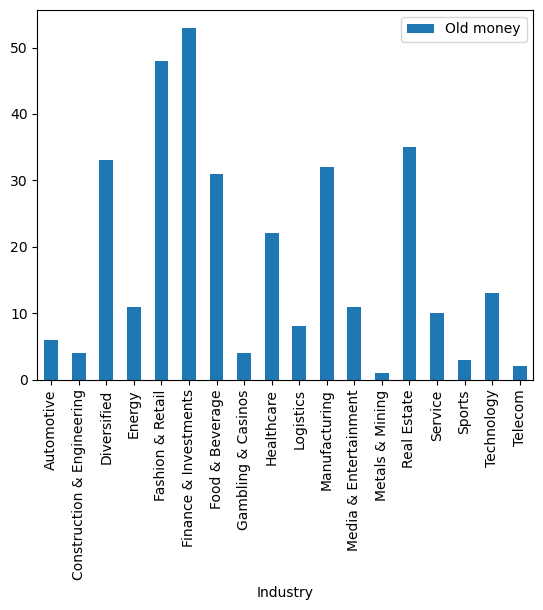

In [489]:
#Визуализируем

Industry_for_old.plot(kind='bar')

In [490]:
#Получилось интересное распределение, которое можно исследовать 
#Начнем с размаха

Industry_for_old['Old money'].max() - Industry_for_old['Old money'].min()

52

In [491]:
#Теперь интерквартильный размах
#Сначала посмотрим информацию о датасете

Industry_for_old.describe()

,Old money
count,18.000000
mean,18.166667
std,16.471901
min,1.000000
25%,4.500000
50%,11.000000
75%,31.750000
max,53.000000


In [492]:
#Посчитаем перцентиль двумя способами отдельно, хотя он у нас указан в таблице

Industry_for_old.describe()['Old money']['25%']

4.5

In [493]:
np.percentile(Industry_for_old['Old money'], 25)

4.5

In [494]:
#Сам интерквантиль

np.percentile(Industry_for_old['Old money'], 75) - np.percentile(Industry_for_old['Old money'], 25)

27.25

In [495]:
#Чтобы найти отклонение, найдем сначала среднее, а затем вычтем его из общего

Industry_for_old_mean = Industry_for_old['Old money'].mean()
deviations = Industry_for_old['Old money'] - Industry_for_old_mean
print(deviations)

Industry
Automotive                   -12.166667
Construction & Engineering   -14.166667
Diversified                   14.833333
Energy                        -7.166667
Fashion & Retail              29.833333
Finance & Investments         34.833333
Food & Beverage               12.833333
Gambling & Casinos           -14.166667
Healthcare                     3.833333
Logistics                    -10.166667
Manufacturing                 13.833333
Media & Entertainment         -7.166667
Metals & Mining              -17.166667
Real Estate                   16.833333
Service                       -8.166667
Sports                       -15.166667
Technology                    -5.166667
Telecom                      -16.166667
Name: Old money, dtype: float64


In [496]:
#Есть отрицательные и положительные отклонения, то есть что-то больше среднего и что-то меньше
#Найдем дисперсию и среднеквадратичное отклонение в выборке

Industry_for_old_mean = Industry_for_old['Old money'].mean()
deviations = Industry_for_old['Old money'] - Industry_for_old_mean
sq_deviations = deviations ** 2
variance_samp = sq_deviations.sum() / len(Industry_for_old) - 1
std_samp = np.sqrt(variance_samp)
print(variance_samp, std_samp)

255.25 15.976545308670458


In [497]:
#Найдем для генеральной совокупности

variance_pop = sq_deviations.sum() / len(Industry_for_old) - 1
std_pop = np.sqrt(variance_pop)
print(variance_pop, std_pop)

255.25 15.976545308670458


In [498]:
#Получились одинаковые значения, значит, выборка отражает генеральную совокупность
#Теперь найдем эти значения при помощи формул

print(Industry_for_old['Old money'].var())
print(Industry_for_old['Old money'].std())

271.32352941176464
16.471901208171587


In [499]:
#Значения отличаются из-за наличия NaN
#Поробуем добавить степень свободы, чтобы приблизиться к значениям, которые мы посчитали вручную

print(Industry_for_old['Old money'].var(ddof=0))
print(Industry_for_old['Old money'].std(ddof=0))

256.24999999999994
16.00781059358212


In [500]:
#Чтобы создать пивотальную таблицу в качестве вывода, которую мы делали для среднего и медианы, сделаем функцию, которую рассчитывает размах

def range_values(x):
    return x.max() - x.min()

billionaire.pivot_table(index='Industry',
                       values=['Age'],
                       aggfunc=['var', 'std', range_values])

,var,std,range_values
,Age,Age,Age
Industry,,,
Automotive,218.310719,14.775342,64.0
Construction & Engineering,159.034330,12.610881,51.0
Diversified,180.112849,13.420613,73.0
Energy,149.789940,12.238870,60.0
Fashion & Retail,189.513835,13.766402,78.0
Finance & Investments,181.576878,13.475046,70.0
Food & Beverage,166.139356,12.889506,70.0
Gambling & Casinos,233.160000,15.269578,48.0


# Z-оценка

<AxesSubplot:>

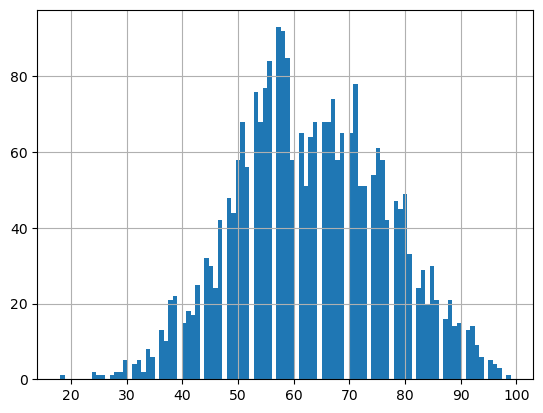

In [501]:
#Посмотрим распределение возрастов, чтобы оценить, какие у нас есть возможности для z-оценки

billionaire['Age'].hist(bins=100)

<AxesSubplot:>

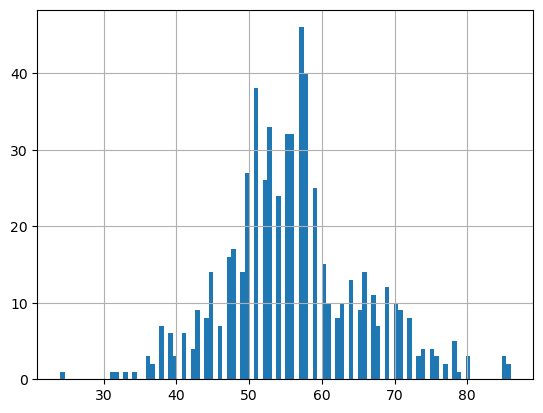

In [502]:
#Попробуем сделать распределение возраста по стране – Китаю

China_age = billionaire[billionaire['Country'] == 'China']
China_age['Age'].hist(bins=100)

<AxesSubplot:>

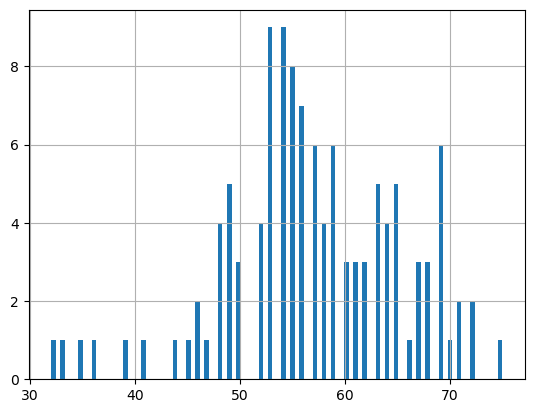

In [503]:
#И возьмем еще одну страну – Россию

Russia_age = billionaire[billionaire['Country'] == 'Russia']
Russia_age['Age'].hist(bins=100)

In [504]:
#Интересно, что у двух стран разное колчиство миллиардеров и распределения тоже отличаются
#Найдем z-оценку от генеральной совокупности 

x = billionaire['Age'][0]
mean = billionaire['Age'].mean()
std = billionaire['Age'].std(ddof=0)
print(x, mean, std)

57.0 63.1136023916293 13.442640487860048


In [505]:
z_score = (x - mean) / std
print(z_score)

-0.4547917797214357


In [506]:
scipy.stats.zscore(billionaire['Age'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2750   NaN
2751   NaN
2752   NaN
2753   NaN
2754   NaN
Name: Age, Length: 2755, dtype: float64

In [507]:
#Из-за формата данных z-оценка не может быть посчитана для всех

In [508]:
#Чтобы посчитать выбросы, оценим датасет Industry_for_old

Industry_for_old['Old money'].describe()

count    18.000000
mean     18.166667
std      16.471901
min       1.000000
25%       4.500000
50%      11.000000
75%      31.750000
max      53.000000
Name: Old money, dtype: float64

In [509]:
#Найдем интерквартильный размах

q3 = np.percentile(Industry_for_old['Old money'], 75)
q1 = np.percentile(Industry_for_old['Old money'], 25)

In [510]:
iqr = q3 - q1
print(iqr)

27.25


In [511]:
#Найдем границу сверху и снизу

iqr_threshold_bottom = q1 - 1.5 * iqr
iqr_threshold_top = q3 + 1.5 * iqr
print(iqr_threshold_bottom, iqr_threshold_top)

-36.375 72.625


In [512]:
#Нижний порог оказался ниже минимального значения
#Посмотрим, сколько выбросов

Industry_for_old[Industry_for_old['Old money'] > iqr_threshold_top].shape

(0, 1)

In [513]:
Industry_for_old.head()

,Old money
Industry,
Automotive,6
Construction & Engineering,4
Diversified,33
Energy,11
Fashion & Retail,48


In [514]:
#Снизим порог 

mean = Industry_for_old['Old money'].mean()
std = Industry_for_old['Old money'].std()
std_threshold_bottom = mean - 2.5 * std
std_threshold_top = mean + 2.5 * std
print(std_threshold_bottom, std_threshold_top)

-23.0130863537623 59.34641968709563


In [515]:
iqr_no_outliers = Industry_for_old[Industry_for_old['Old money'] <= iqr_threshold_top]
std_no_outliers = Industry_for_old[Industry_for_old['Old money'] <= std_threshold_top]

In [516]:
print(Industry_for_old['Old money'].mean())
print(iqr_no_outliers['Old money'].mean())
print(std_no_outliers['Old money'].mean())

18.166666666666668
18.166666666666668
18.166666666666668


In [517]:
#Как оказалось, данный датасет не очень подходит под подсчет размахов, данные однотипны, выбросов почти нет
#Теперь поработаем с пропущенными значениями

billionaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       2755 non-null   object  
 1   NetWorth   2755 non-null   object  
 2   Country    2755 non-null   object  
 3   Source     2755 non-null   object  
 4   Rank       2755 non-null   int64   
 5   Age        2676 non-null   float64 
 6   Industry   2755 non-null   object  
 7   Old money  2755 non-null   int64   
 8   Age level  2676 non-null   category
 9   Miracle    2755 non-null   int64   
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 196.7+ KB


In [518]:
billionaire.isna().sum()

Name          0
NetWorth      0
Country       0
Source        0
Rank          0
Age          79
Industry      0
Old money     0
Age level    79
Miracle       0
dtype: int64

In [519]:
#Как видим, у нас есть пропущенные значения в возрасте (и в z-оценке из-за попытки посчитать)
#Посмотрим часть датасета, где нет данных по возрасту

billionaire[billionaire['Age'].isna()]

,Name,NetWorth,Country,Source,Rank,Age,Industry,Old money,Age level,Miracle
132,Hinduja brothers,$14.9 B,United Kingdom,diversified,133,NaN,Diversified,0,NaN,0
255,Lam Wai-ying,$9.1 B,Hong Kong,smartphone screens,256,NaN,Manufacturing,0,NaN,0
268,Chan Tan Ching-fen,$8.8 B,Hong Kong,real estate,269,NaN,Real Estate,0,NaN,0
285,Anthony von Mandl,$8.7 B,Canada,alcoholic beverages,274,NaN,Food & Beverage,0,NaN,0
294,Kuldip Singh & Gurbachan Singh Dhingra,$8.4 B,India,paints,294,NaN,Manufacturing,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2580,Lai Baosheng,$1.1 B,China,consumer technology,2524,NaN,Technology,0,NaN,0
2639,Tseng Sing-ai,$1.1 B,Taiwan,petrochemicals,2524,NaN,Manufacturing,0,NaN,0
2680,Carmen Daurella Aguilera,$1 B,Spain,Coca-Cola bottler,2674,NaN,Food & Beverage,0,NaN,0
2714,Michael McCain,$1 B,Canada,packaged meats,2674,NaN,Food & Beverage,0,NaN,0


In [520]:
#Посмотрим тип nan

type(billionaire[billionaire['Age'].isna()]['Age'][132])

numpy.float64

In [521]:
#Это число
#Можно выбросить значения, где данных нет

billionaire.dropna(subset=['Age']).shape

(2676, 10)

In [522]:
#Как мы видим, данные удалились, стало меньше строк
#А можно заполнить эти ячейки какими-нибудь значениями
#Заполним значением медианы – 63

billionaire['Age_median'] = billionaire['Age'].fillna(63)
billionaire[billionaire['Age'].isna()].head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,Old money,Age level,Miracle,Age_median
132,Hinduja brothers,$14.9 B,United Kingdom,diversified,133,NaN,Diversified,0,NaN,0,63.0
255,Lam Wai-ying,$9.1 B,Hong Kong,smartphone screens,256,NaN,Manufacturing,0,NaN,0,63.0
268,Chan Tan Ching-fen,$8.8 B,Hong Kong,real estate,269,NaN,Real Estate,0,NaN,0,63.0
285,Anthony von Mandl,$8.7 B,Canada,alcoholic beverages,274,NaN,Food & Beverage,0,NaN,0,63.0
294,Kuldip Singh & Gurbachan Singh Dhingra,$8.4 B,India,paints,294,NaN,Manufacturing,0,NaN,0,63.0


In [523]:
#Добавилась новая переменная с указанным возрастом
#Теперь подставим медиану не вручную, а по формуле для точности

billionaire['Age_median'] = billionaire['Age'].fillna(billionaire['Age'].median())
billionaire[billionaire['Age'].isna()].head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,Old money,Age level,Miracle,Age_median
132,Hinduja brothers,$14.9 B,United Kingdom,diversified,133,NaN,Diversified,0,NaN,0,63.0
255,Lam Wai-ying,$9.1 B,Hong Kong,smartphone screens,256,NaN,Manufacturing,0,NaN,0,63.0
268,Chan Tan Ching-fen,$8.8 B,Hong Kong,real estate,269,NaN,Real Estate,0,NaN,0,63.0
285,Anthony von Mandl,$8.7 B,Canada,alcoholic beverages,274,NaN,Food & Beverage,0,NaN,0,63.0
294,Kuldip Singh & Gurbachan Singh Dhingra,$8.4 B,India,paints,294,NaN,Manufacturing,0,NaN,0,63.0


In [524]:
#Измениться ничего не должно, но теперь система считает медиану сама
#Выделим часть датасета и посмотрим, как будет считаться новая переменная

billionaire.iloc[50:60]

,Name,NetWorth,Country,Source,Rank,Age,Industry,Old money,Age level,Miracle,Age_median
50,Alexey Mordashov & family,$29.1 B,Russia,"steel, investments",51,55.0,Metals & Mining,0,wise,0,55.0
51,Robin Zeng,$28.4 B,Hong Kong,batteries,52,52.0,Energy,0,wise,0,52.0
52,Hui Ka Yan,$27.7 B,China,real estate,53,62.0,Real Estate,0,wise,0,62.0
53,Susanne Klatten,$27.7 B,Germany,"BMW, pharmaceuticals",53,58.0,Automotive,0,wise,0,58.0
54,Vladimir Potanin,$27 B,Russia,metals,55,60.0,Metals & Mining,0,wise,0,60.0
55,Dietrich Mateschitz,$26.9 B,Austria,Red Bull,56,76.0,Food & Beverage,0,old money,0,76.0
56,Pang Kang,$26.4 B,China,soy sauce,57,65.0,Food & Beverage,0,wise,0,65.0
57,Klaus-Michael Kuehne,$26.3 B,Germany,shipping,58,83.0,Logistics,1,old money,0,83.0
58,Vladimir Lisin,$26.2 B,Russia,"steel, transport",59,64.0,Metals & Mining,0,wise,0,64.0
59,Wang Xing,$26.1 B,China,e-commerce,60,42.0,Technology,0,mature,0,42.0


In [525]:
#Возраст меняется, данные могут сильно искажаться в зависимости от выбранной области
#Попробуем другой способ 
#Рандомайзер

np.random.choice(billionaire['Age'].dropna())

58.0

In [526]:
age_random = np.random.choice(billionaire['Age'].dropna(), 2720)

In [527]:
age_random[:79]

array([73., 54., 77., 54., 79., 56., 78., 74., 92., 74., 53., 43., 79.,
       56., 80., 47., 49., 48., 48., 73., 79., 47., 49., 58., 77., 45.,
       92., 86., 62., 70., 47., 69., 34., 71., 50., 57., 53., 51., 47.,
       58., 52., 62., 72., 45., 58., 67., 58., 83., 82., 67., 61., 51.,
       66., 61., 83., 80., 91., 50., 57., 54., 56., 79., 50., 60., 75.,
       58., 43., 70., 75., 69., 66., 48., 67., 79., 72., 57., 66., 92.,
       65.])

In [528]:
billionaire['Age random'] = billionaire['Age'].fillna(pd.Series(age_random))

In [529]:
billionaire[billionaire['Age'].isna()].head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,Old money,Age level,Miracle,Age_median,Age random
132,Hinduja brothers,$14.9 B,United Kingdom,diversified,133,NaN,Diversified,0,NaN,0,63.0,68.0
255,Lam Wai-ying,$9.1 B,Hong Kong,smartphone screens,256,NaN,Manufacturing,0,NaN,0,63.0,69.0
268,Chan Tan Ching-fen,$8.8 B,Hong Kong,real estate,269,NaN,Real Estate,0,NaN,0,63.0,76.0
285,Anthony von Mandl,$8.7 B,Canada,alcoholic beverages,274,NaN,Food & Beverage,0,NaN,0,63.0,54.0
294,Kuldip Singh & Gurbachan Singh Dhingra,$8.4 B,India,paints,294,NaN,Manufacturing,0,NaN,0,63.0,76.0


In [530]:
#В целом, оба способа в нашем случае работают нормально, они правдоподобны
#Попробуем взять значения глубже – медиану по стране

billionaire.groupby([billionaire['Country']])['Age'].median()

Country
Algeria           77.0
Argentina         86.5
Australia         67.0
Austria           73.5
Belgium           59.0
                  ... 
United Kingdom    68.0
United States     66.0
Venezuela         61.0
Vietnam           54.5
Zimbabwe          60.0
Name: Age, Length: 70, dtype: float64

In [531]:
age_median = billionaire.groupby([billionaire['Country']])['Age'].transform('median')

In [532]:
billionaire['Age median by country'] = billionaire['Age'].fillna(age_median)

In [533]:
billionaire[billionaire['Age'].isna()].head()

,Name,NetWorth,Country,Source,Rank,Age,Industry,Old money,Age level,Miracle,Age_median,Age random,Age median by country
132,Hinduja brothers,$14.9 B,United Kingdom,diversified,133,NaN,Diversified,0,NaN,0,63.0,68.0,68.0
255,Lam Wai-ying,$9.1 B,Hong Kong,smartphone screens,256,NaN,Manufacturing,0,NaN,0,63.0,69.0,64.0
268,Chan Tan Ching-fen,$8.8 B,Hong Kong,real estate,269,NaN,Real Estate,0,NaN,0,63.0,76.0,64.0
285,Anthony von Mandl,$8.7 B,Canada,alcoholic beverages,274,NaN,Food & Beverage,0,NaN,0,63.0,54.0,61.0
294,Kuldip Singh & Gurbachan Singh Dhingra,$8.4 B,India,paints,294,NaN,Manufacturing,0,NaN,0,63.0,76.0,68.0


In [534]:
#Данные по разным способам заполнения получились разными, но все правдоподобны

billionaire['Age'] = billionaire['Age'].fillna(age_median)

In [535]:
del billionaire['Age_median']

In [537]:
del billionaire['Age random']

In [538]:
del billionaire['Age median by country']

In [543]:
billionaire['Age level'] = pd.Categorical(billionaire['Age'].apply(age_level))

In [544]:
billionaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       2755 non-null   object  
 1   NetWorth   2755 non-null   object  
 2   Country    2755 non-null   object  
 3   Source     2755 non-null   object  
 4   Rank       2755 non-null   int64   
 5   Age        2755 non-null   float64 
 6   Industry   2755 non-null   object  
 7   Old money  2755 non-null   int64   
 8   Age level  2755 non-null   category
 9   Miracle    2755 non-null   int64   
dtypes: category(1), float64(1), int64(3), object(5)
memory usage: 196.7+ KB


In [545]:
#Готово. Теперь пропущенных значений в возрасте нет

# Корреляция

In [546]:
#Сначала посчитаем средний возраст по странам

billionaire.groupby(billionaire['Country'])['Age'].mean()

Country
Algeria           77.000000
Argentina         85.900000
Australia         65.340909
Austria           69.583333
Belgium           60.666667
                    ...    
United Kingdom    66.767857
United States     66.009669
Venezuela         61.000000
Vietnam           55.000000
Zimbabwe          60.000000
Name: Age, Length: 70, dtype: float64

In [547]:
#Для второй переменной возьмем среднее место в рейтинге по стране
#Очень притянуто за уши, но других числовых значений в датасете нет

billionaire.groupby(billionaire['Country'])['Rank'].mean()

Country
Algeria            589.000000
Argentina         1274.200000
Australia         1377.795455
Austria           1247.583333
Belgium           1595.666667
                     ...     
United Kingdom    1288.964286
United States     1206.638122
Venezuela          956.000000
Vietnam           1523.166667
Zimbabwe          2035.000000
Name: Rank, Length: 70, dtype: float64

In [548]:
#Пропишем переменные

age_mean = billionaire.groupby(billionaire['Country'])['Age'].mean()
rank_mean = billionaire.groupby(billionaire['Country'])['Rank'].mean()

In [549]:
#Сделаем отдельную таблицу

billionaire_country = pd.concat([age_mean, rank_mean], axis=1)

In [550]:
#Попробуем отобразить первые пять

first_five = billionaire_country.iloc[:5]
first_five

,Age,Rank
Country,,
Algeria,77.000000,589.000000
Argentina,85.900000,1274.200000
Australia,65.340909,1377.795455
Austria,69.583333,1247.583333
Belgium,60.666667,1595.666667


In [551]:
#Насколько наше наблюдение отличается от среднего

first_five['X - Mx'] = first_five['Age'] - first_five['Age'].mean()
first_five['Y - My'] = first_five['Rank'] - first_five['Rank'].mean()

/var/folders/jy/19935xz9733_z00yc47rxw8m0000gn/T/ipykernel_26206/1934439140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five['X - Mx'] = first_five['Age'] - first_five['Age'].mean()
/var/folders/jy/19935xz9733_z00yc47rxw8m0000gn/T/ipykernel_26206/1934439140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five['Y - My'] = first_five['Rank'] - first_five['Rank'].mean()


In [552]:
first_five

,Age,Rank,X - Mx,Y - My
Country,,,,
Algeria,77.000000,589.000000,5.301818,-627.849091
Argentina,85.900000,1274.200000,14.201818,57.350909
Australia,65.340909,1377.795455,-6.357273,160.946364
Austria,69.583333,1247.583333,-2.114848,30.734242
Belgium,60.666667,1595.666667,-11.031515,378.817576


In [553]:
#Посчитаем сумму квадратов отклонений

SSx = (first_five['X - Mx'] ** 2).sum()
SSy = (first_five['Y - My'] ** 2).sum()
SP = (first_five['X - Mx'] * first_five['Y - My']).sum()
print(SSx, SSy, SP)

396.3827428833795 567834.689056933 -7781.364562901745


In [554]:
#Найдем корреляцию 

r = SP / np.sqrt(SSx * SSy)
print(r)

-0.5186655865269267


In [555]:
first_five['Age'].corr(first_five['Rank'])

-0.5186655865269266

<AxesSubplot:xlabel='Age', ylabel='Rank'>

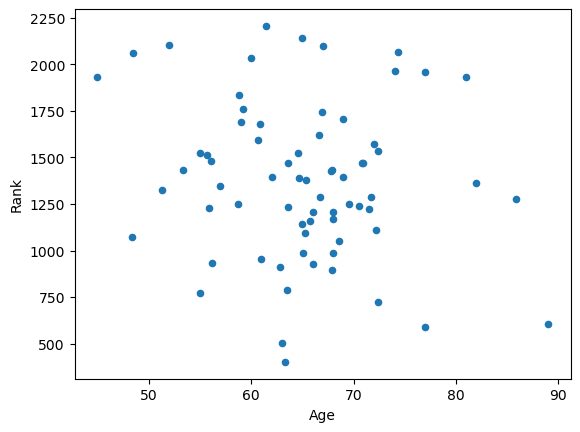

In [556]:
billionaire_country.plot('Age', 'Rank', kind='scatter')

In [557]:
#Видим, что корреляции между возрастом и местом нет
#Найдем корреляцию по всем

billionaire_country['Age'].corr(billionaire_country['Rank'])

-0.1519981834692548

In [558]:
#Достанем все возможные корреляции по всем числовым значениям

billionaire.corr()

,Rank,Age,Old money,Miracle
Rank,1.000000,-0.106313,-0.082456,-0.026434
Age,-0.106313,1.000000,0.617554,-0.048972
Old money,-0.082456,0.617554,1.000000,-0.006993
Miracle,-0.026434,-0.048972,-0.006993,1.000000


In [559]:
#Как было сказано раннее, в данном датасете мало числовых значений, по возможным корреляция посчитана всеми способами, а остальные значения – бинарные
#Возьмем отдельно корреляцию по возрасту, отсортируем и уберем минусы

billionaire.corr()['Age'].apply(np.abs).sort_values()

Miracle      0.048972
Rank         0.106313
Old money    0.617554
Age          1.000000
Name: Age, dtype: float64

In [560]:
#Приведем в более наглядный вид

corr = billionaire.corr()

In [561]:
corr.abs().unstack().sort_values()

Old money  Miracle      0.006993
Miracle    Old money    0.006993
Rank       Miracle      0.026434
Miracle    Rank         0.026434
Age        Miracle      0.048972
Miracle    Age          0.048972
Rank       Old money    0.082456
Old money  Rank         0.082456
Rank       Age          0.106313
Age        Rank         0.106313
           Old money    0.617554
Old money  Age          0.617554
Rank       Rank         1.000000
Age        Age          1.000000
Old money  Old money    1.000000
Miracle    Miracle      1.000000
dtype: float64

In [562]:
#Как видно, самая высокая корреляция у возраста и отношения к группе пожилых миллиардеров

# Визуализация данных

In [564]:
#Объединим данные по индустриям и найдем средний возраст

industry_age = billionaire.groupby(billionaire['Industry'])['Age'].mean()
industry_age

Industry
Automotive                    61.250000
Construction & Engineering    64.795455
Diversified                   67.289894
Energy                        64.750000
Fashion & Retail              66.058608
Finance & Investments         64.544474
Food & Beverage               65.105023
Gambling & Casinos            67.080000
Healthcare                    62.610860
Logistics                     66.057143
Manufacturing                 62.383686
Media & Entertainment         62.100000
Metals & Mining               59.081081
Real Estate                   66.053488
Service                       63.386667
Sports                        70.666667
Technology                    55.135616
Telecom                       64.718750
Name: Age, dtype: float64

<BarContainer object of 18 artists>

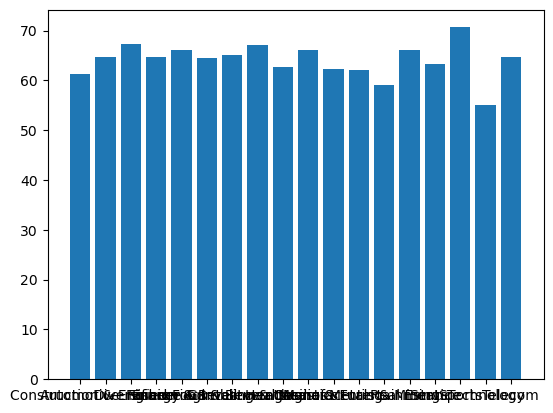

In [565]:
#Построим график

plt.bar(industry_age.index, industry_age)

<BarContainer object of 18 artists>

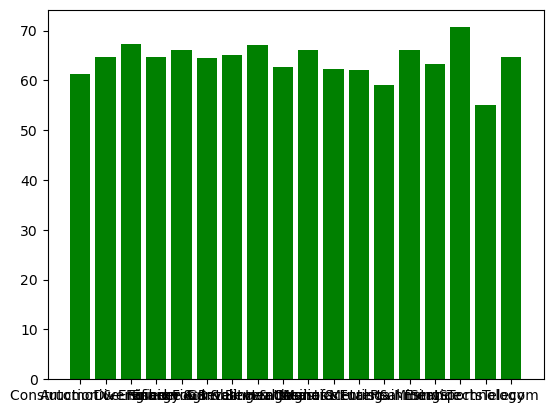

In [566]:
#Поменяем цвет столбиков

plt.bar(industry_age.index, industry_age, color='green')

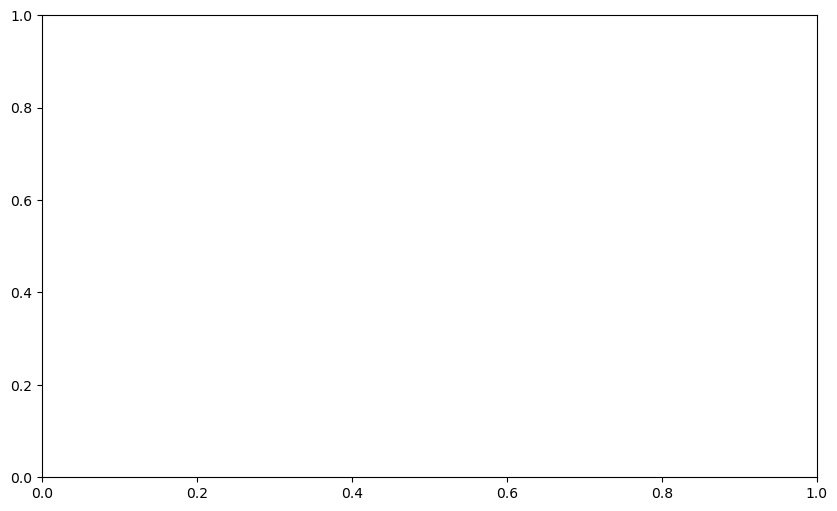

In [569]:
#Подберем формат графика без данных

fig, ax = plt.subplots(figsize=(10, 6))

<BarContainer object of 18 artists>

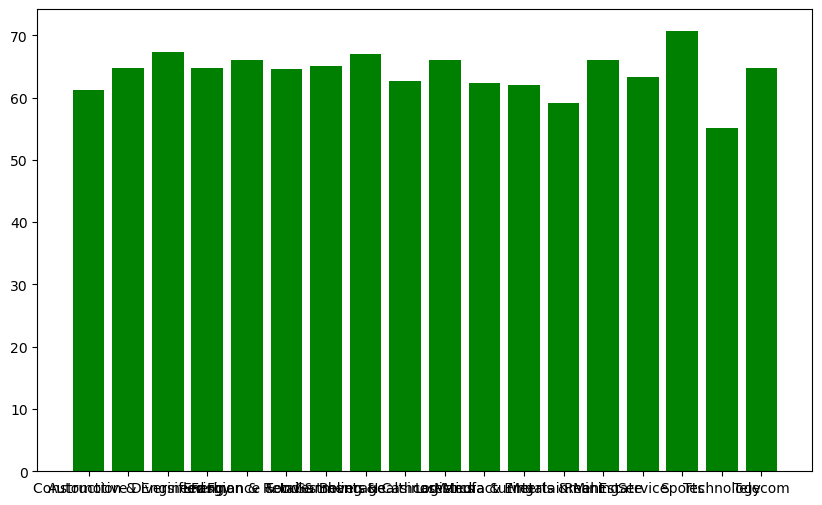

In [571]:
#Теперь мы сможем настраивать график, если понадобится

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(industry_age.index, industry_age, color='green')

In [574]:
#Как видно, график стал другого размера
#Теперь построим линейный

billionaire_mean = billionaire.groupby(billionaire['Industry'])['Age'].mean()

In [575]:
billionaire_mean

Industry
Automotive                    61.250000
Construction & Engineering    64.795455
Diversified                   67.289894
Energy                        64.750000
Fashion & Retail              66.058608
Finance & Investments         64.544474
Food & Beverage               65.105023
Gambling & Casinos            67.080000
Healthcare                    62.610860
Logistics                     66.057143
Manufacturing                 62.383686
Media & Entertainment         62.100000
Metals & Mining               59.081081
Real Estate                   66.053488
Service                       63.386667
Sports                        70.666667
Technology                    55.135616
Telecom                       64.718750
Name: Age, dtype: float64

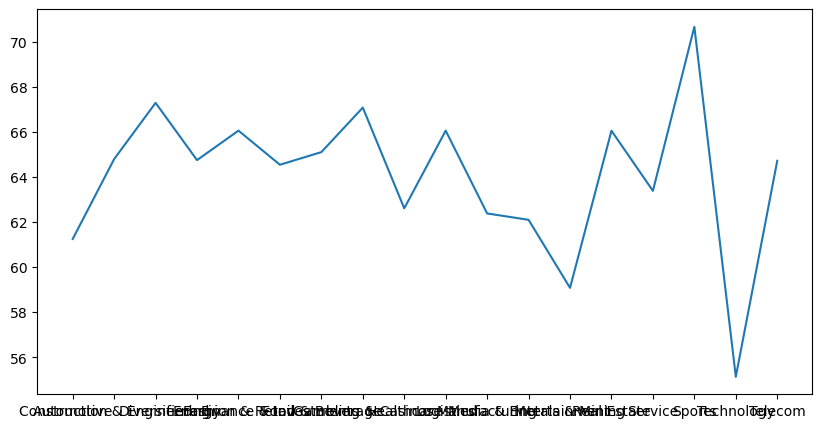

In [577]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(billionaire_mean)

In [579]:
#Добавим данных

country = billionaire.groupby(['Country', 'Industry'])['Age'].mean()
country

Country    Industry             
Algeria    Food & Beverage          77.0
Argentina  Diversified              88.0
           Energy                   80.5
           Healthcare               94.0
           Technology               86.5
                                    ... 
Vietnam    Diversified              51.0
           Finance & Investments    50.0
           Food & Beverage          57.0
           Manufacturing            60.0
Zimbabwe   Telecom                  60.0
Name: Age, Length: 436, dtype: float64

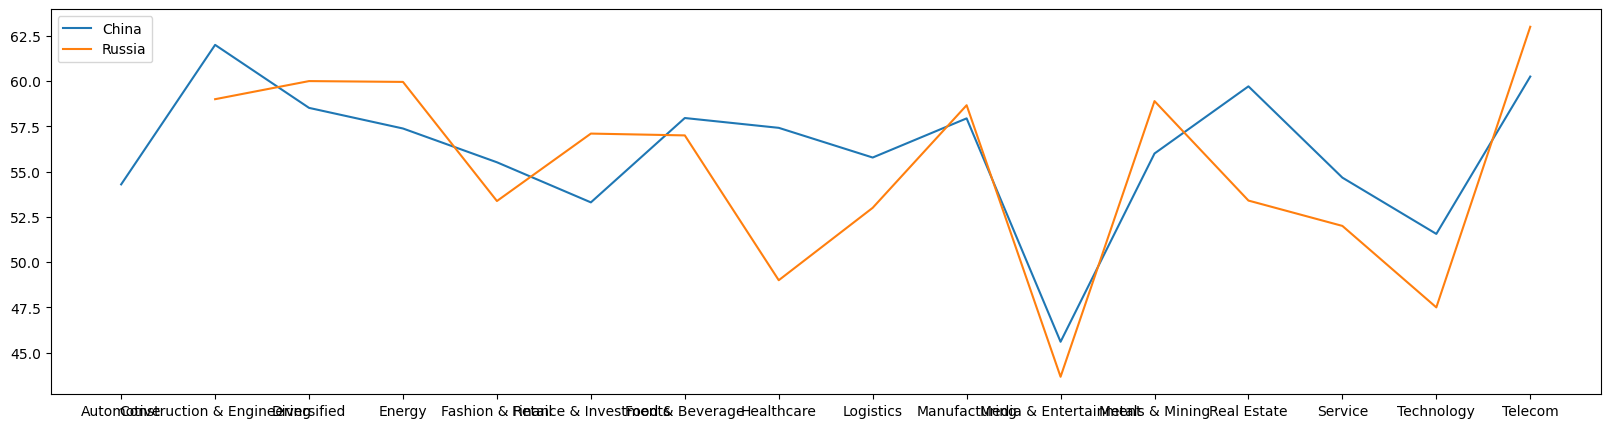

In [584]:
#Изобразим средний возраст по России и Китаю по индустриям

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(country.loc['China'])
ax.plot(country.loc['Russia'])
ax.legend(['China', 'Russia'])

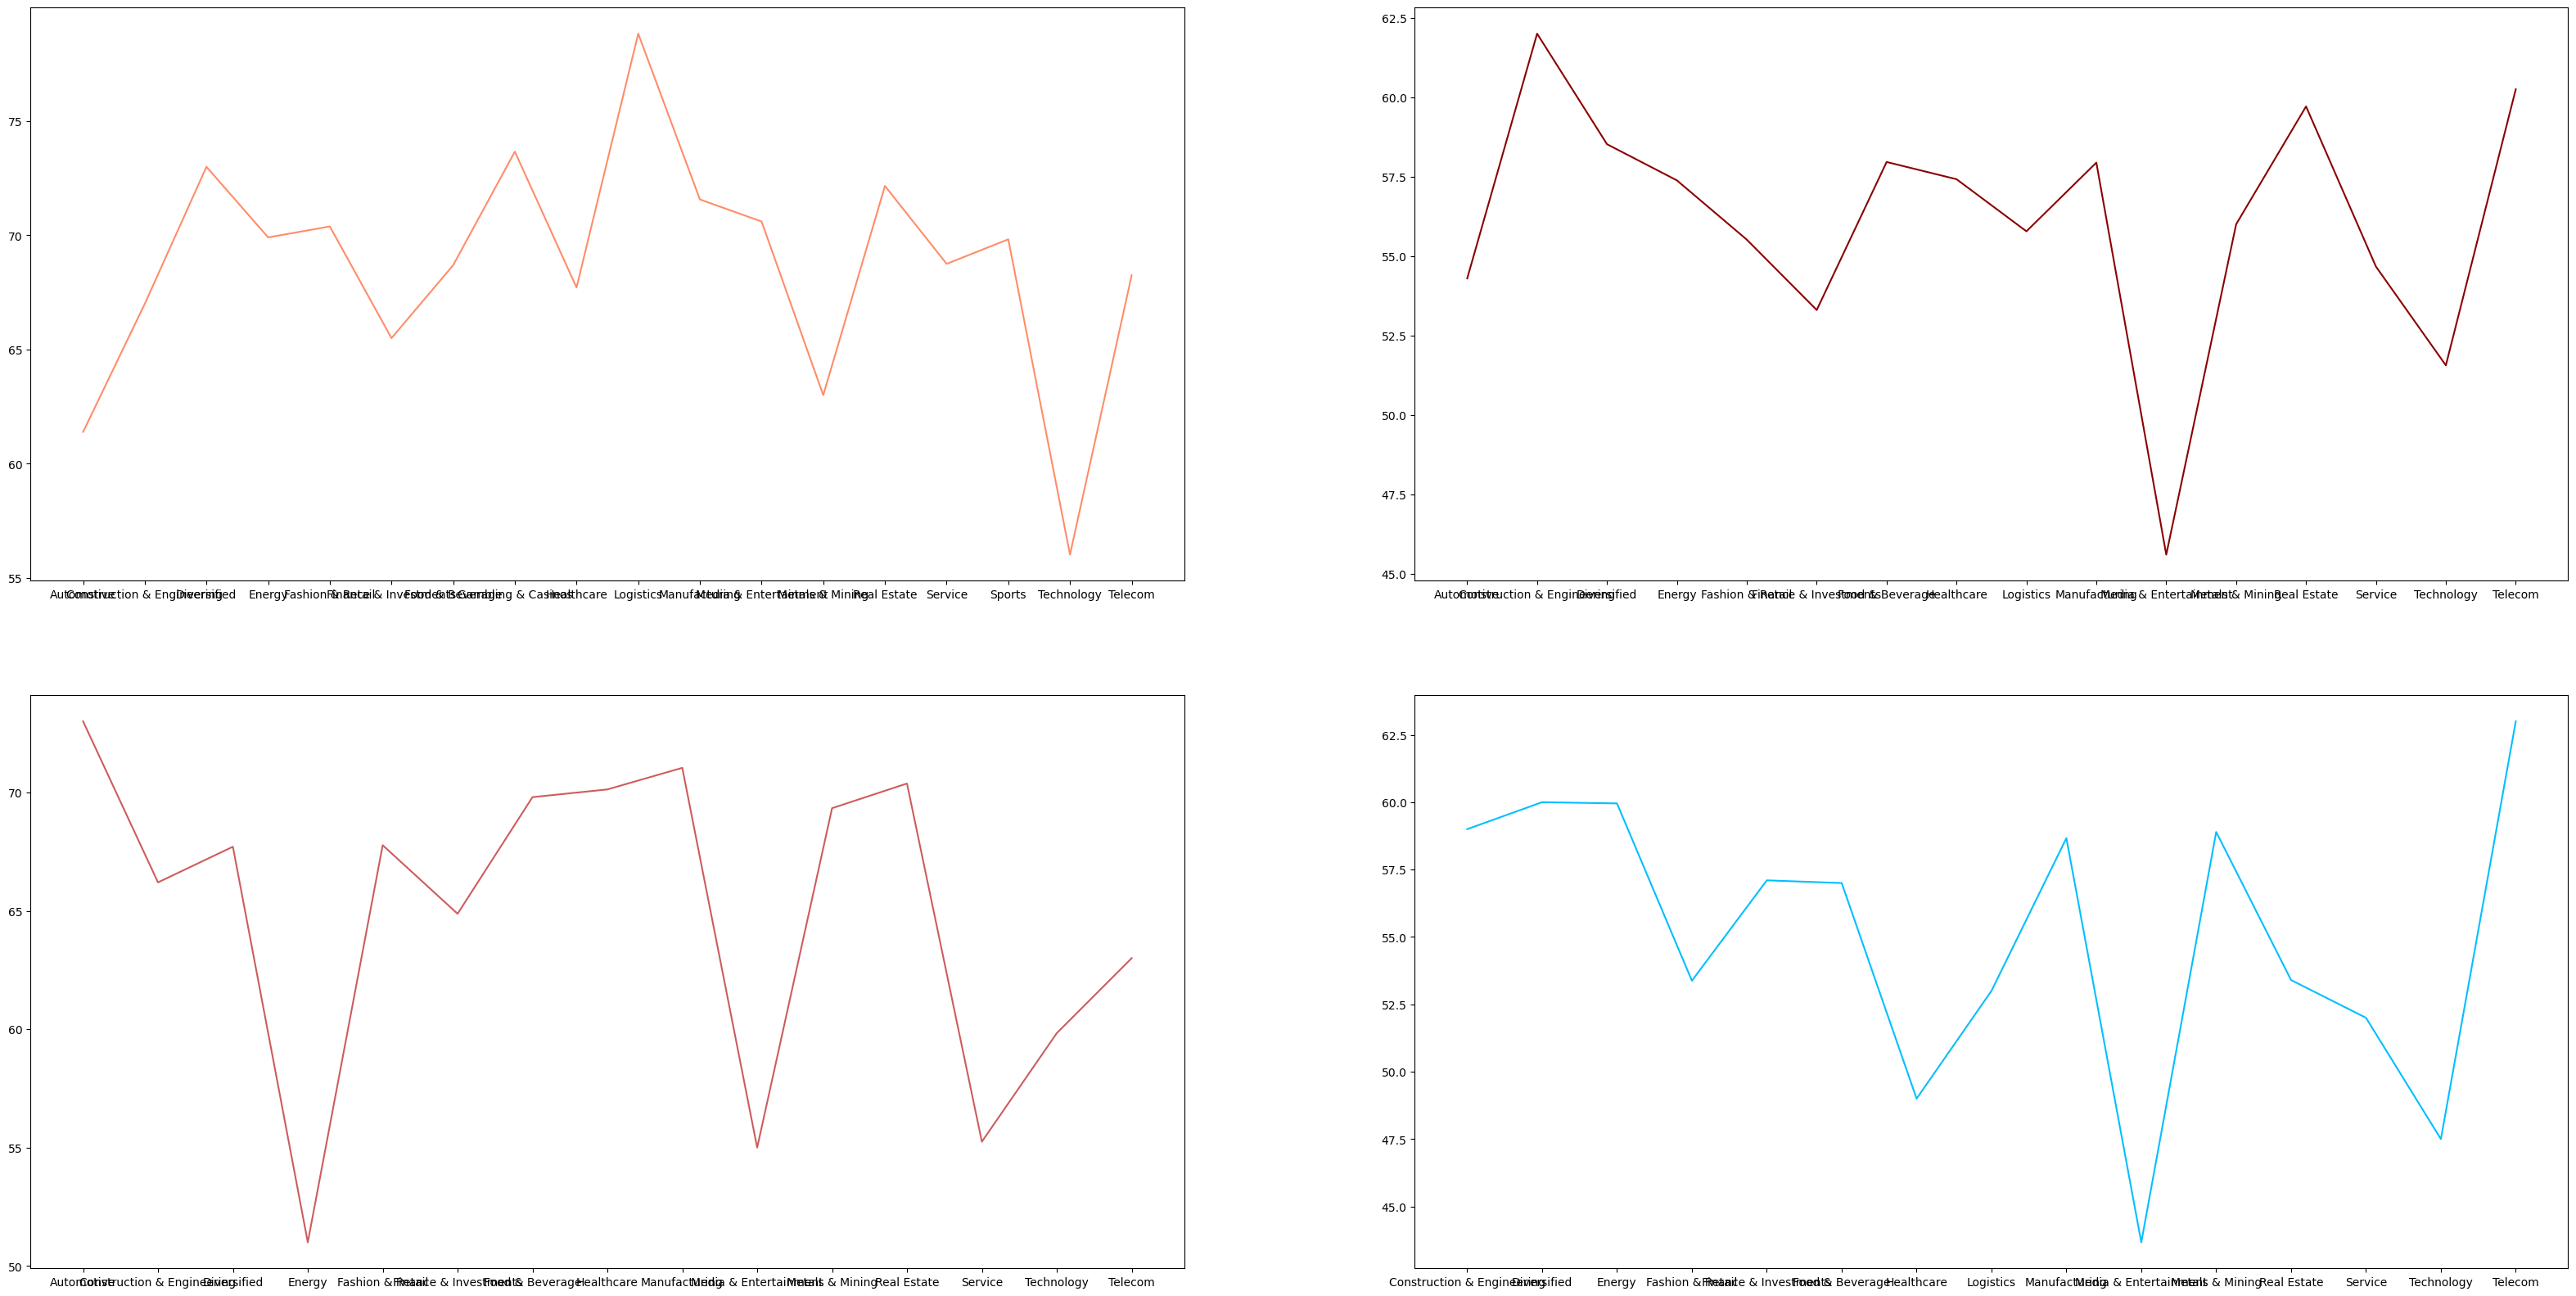

In [595]:
#Интересно, что в России миллиардеры моложе в сферах здоровья, моды, недвижимости, сервиса и технологий
#Попробуем сделать несколько графиков по разным странам

fig, ax = plt.subplots(2,2, figsize=(40,20))

ax[0][0].plot(country.loc['United States'], c='#ff8c69')
ax[0][1].plot(country.loc['China'], c='#8B0000')
ax[1][0].plot(country.loc['India'], c='#CD5C5C')
ax[1][1].plot(country.loc['Russia'], c='#00BFFF')

Text(0.5, 0.98, 'Billionaires mean age per industry in different countries')

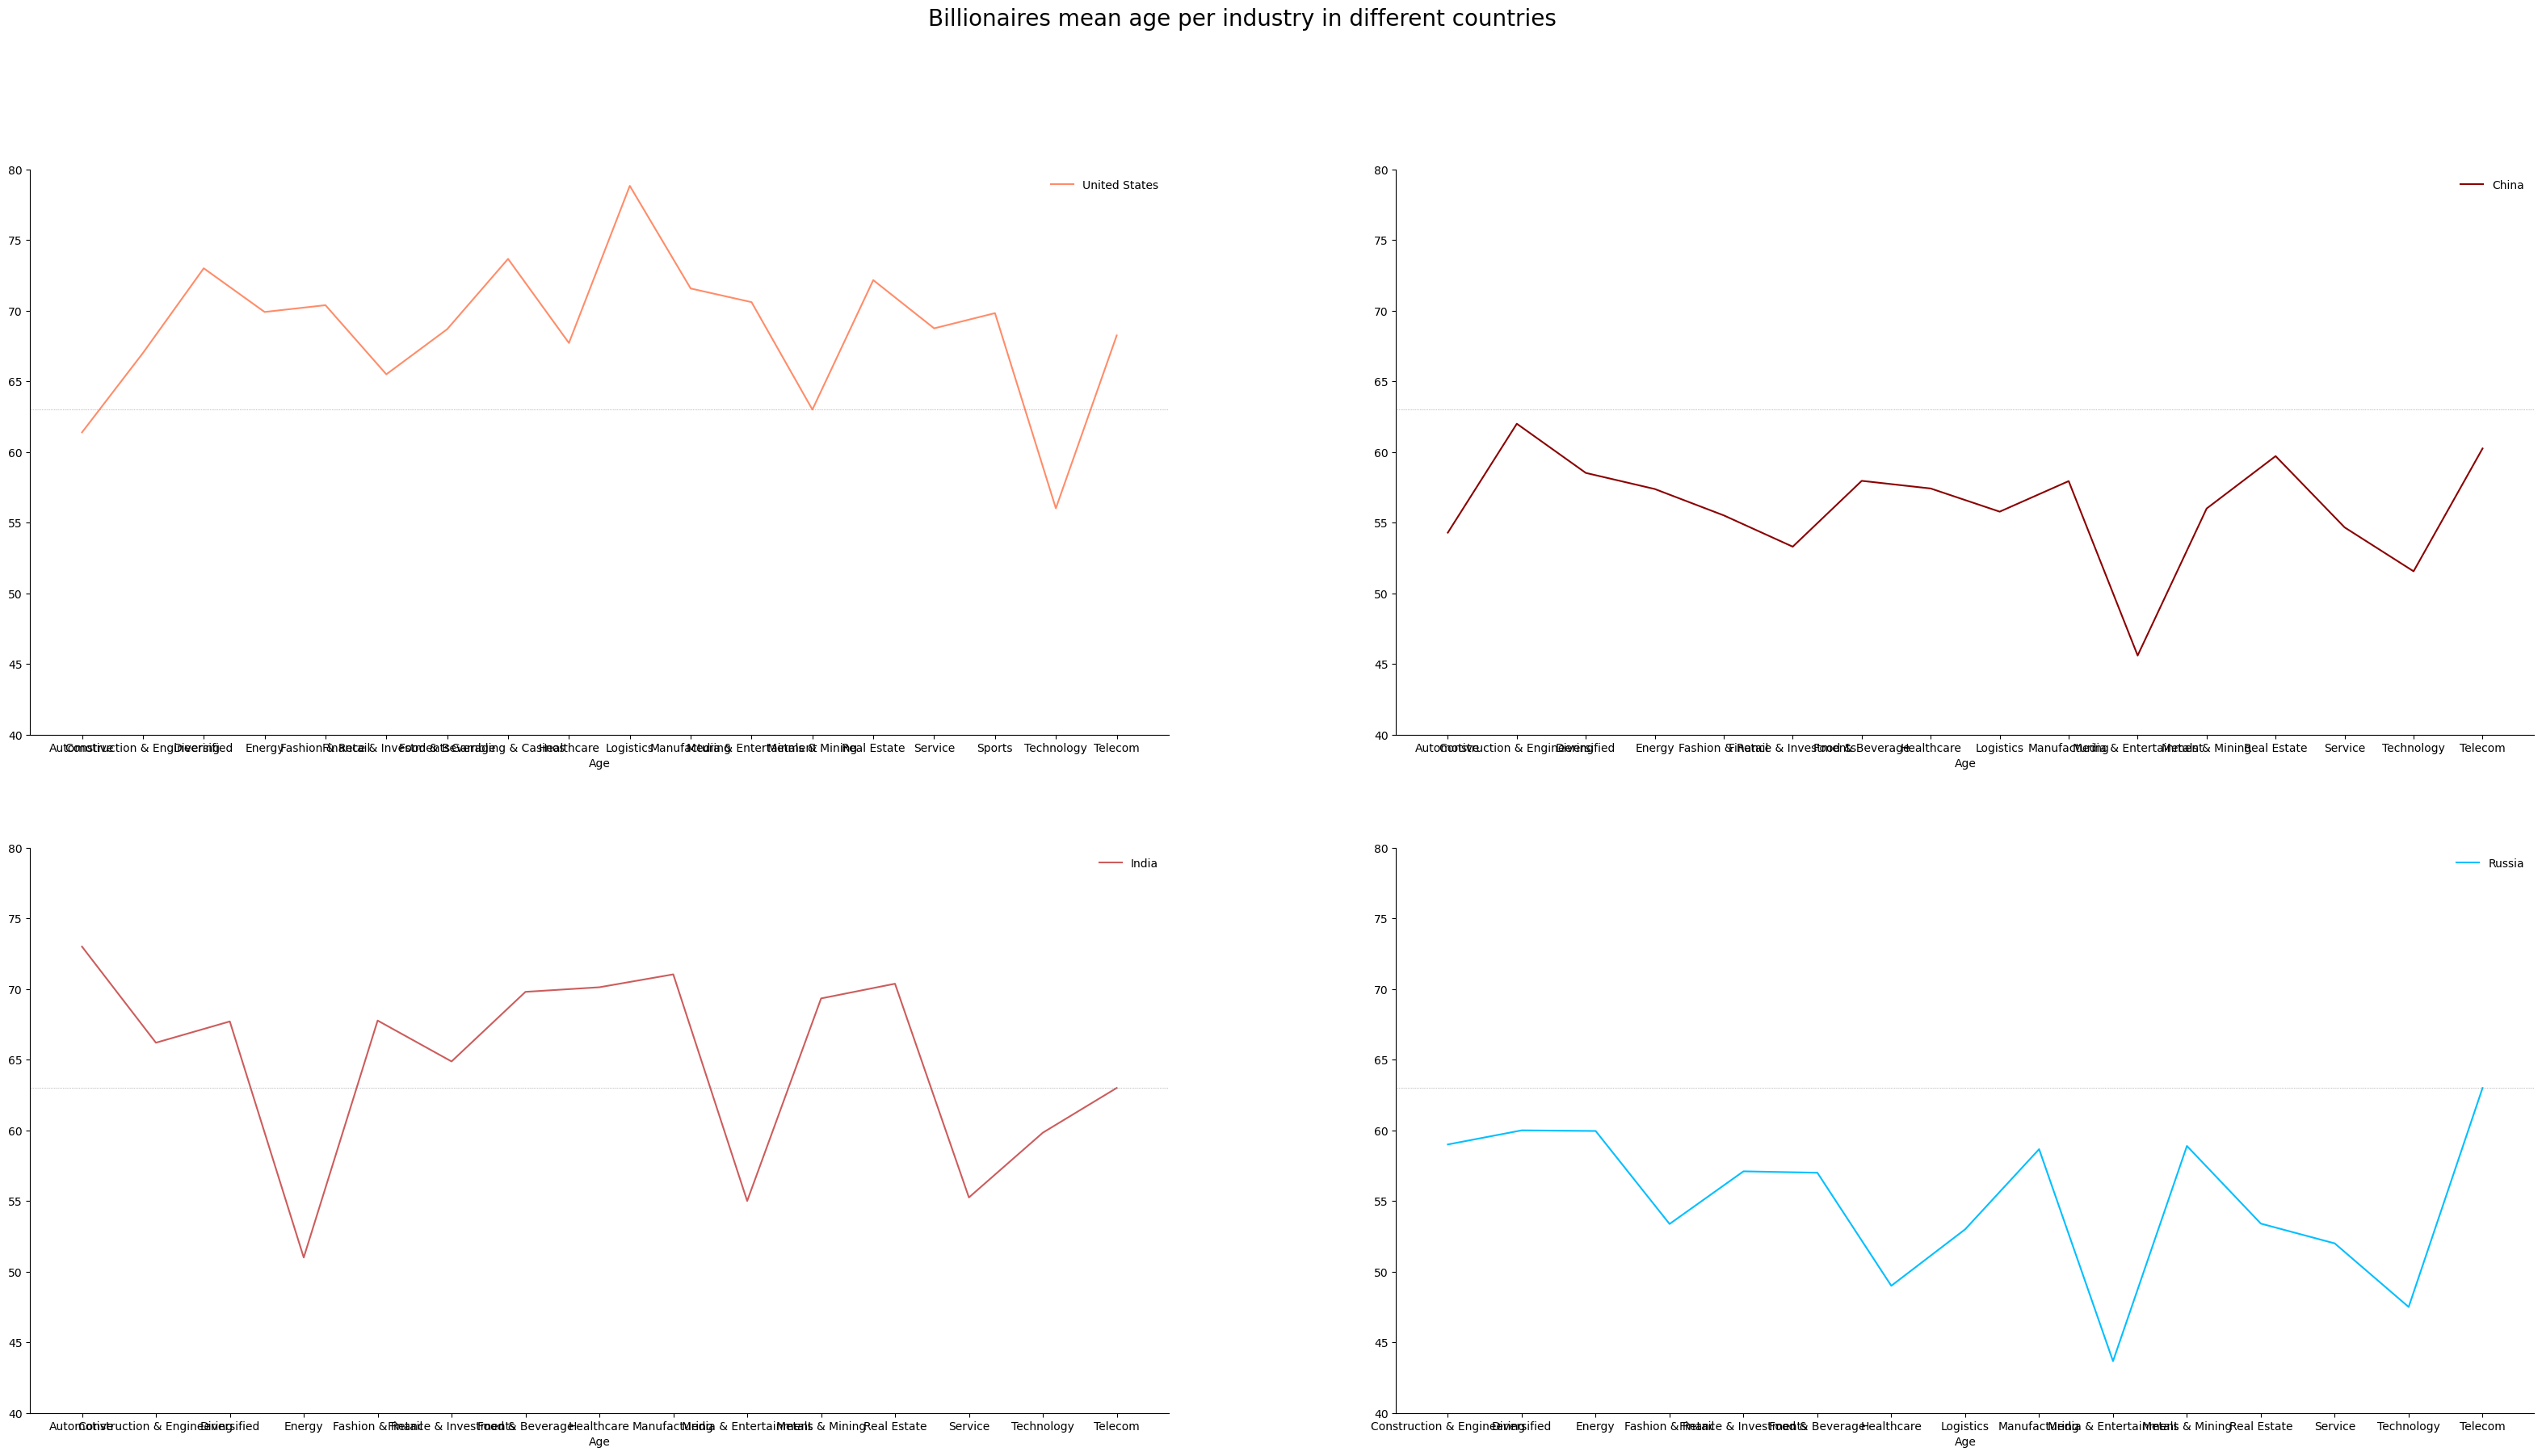

In [612]:
#По разным странам распределения достаточно отличаются
#Однако на всех графиках разные шкалы – стандартизуем
#Красиво оформим

fig, ax = plt.subplots(2,2, figsize=(40,20))

ax[0][0].plot(country.loc['United States'], c='#ff8c69')
ax[0][1].plot(country.loc['China'], c='#8B0000')
ax[1][0].plot(country.loc['India'], c='#CD5C5C')
ax[1][1].plot(country.loc['Russia'], c='#00BFFF')

for axis in ax.ravel():
    axis.set_ylim(40,80)
    axis.set_xlabel('Industry')
    axis.set_xlabel('Age')
    axis.axhline(63, c='grey', lw=0.5, ls=':')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
ax[0][0].legend(['United States'], frameon=False)
ax[0][1].legend(['China'], frameon=False)
ax[1][0].legend(['India'], frameon=False)
ax[1][1].legend(['Russia'], frameon=False)

fig.suptitle('Billionaires mean age per industry in different countries', fontsize=20)

In [615]:
#Сохраним графики

fig.savefig('meanage.pdf')

In [616]:
fig.savefig('meanage.png', dpi=100)

In [636]:
billionaire['Old'] = np.where(billionaire['Age'].isin(['United States']) + billionaire['Old money'], 1, 0)

Old = billionaire.groupby('Country')['Old'].max()
age_mean = billionaire.groupby('Country')['Age'].max()
rank_mean = billionaire.groupby('Country')['Rank'].max()

billionaire_age = pd.concat([Old, age_mean, rank_mean], axis=1)
billionaire_age

,Old,Age,Rank
Country,,,
Algeria,0,77.0,589
Argentina,1,94.0,2263
Australia,1,90.0,2674
Austria,1,92.0,2524
Belgium,0,74.0,2524
...,...,...,...
United Kingdom,1,95.0,2674
United States,1,99.0,2674
Venezuela,0,61.0,956


Text(0.5, 1.0, 'Correlation between billionaires age and rank')

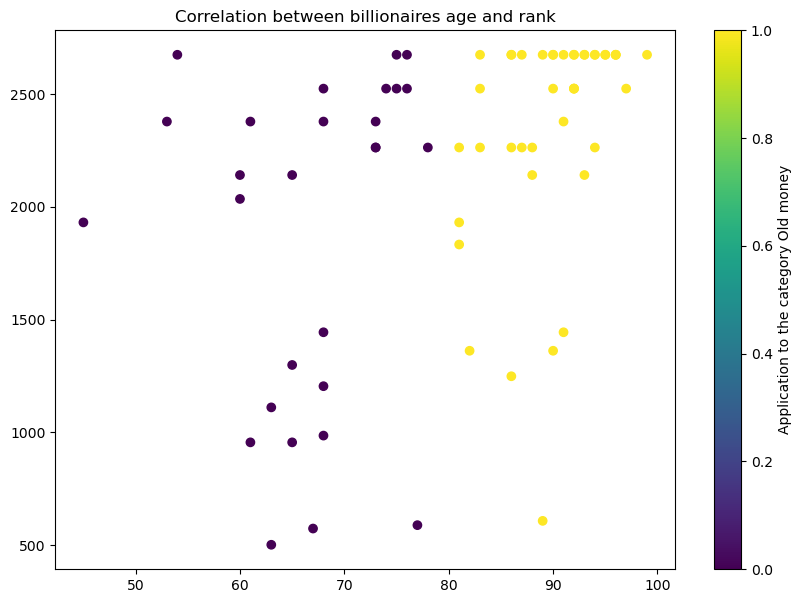

In [641]:
#Из-за слабой корреляции между данными и малым количеством числовых значений будет сложно изобразить интересный график, но попробуем
#Также, красиво оформим

fig, ax = plt.subplots(figsize=(10,7))
graph = ax.scatter(billionaire_age['Age'], billionaire_age['Rank'], c = billionaire_age['Old'])

plt.colorbar(graph, label='Application to the category Old money')


ax.set_title('Correlation between billionaires age and rank')

In [ ]:
#Вышел достаточно примитивный график, но при недостатке числовых значений главное, что он получился
#Снова видим, что корреляция слабая